In [1]:
import numpy as np
import numpy.linalg as LA
import jax
import jax.numpy as jnp

import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from jax.example_libraries import optimizers
from tqdm.notebook import trange
from functools import partial

In [2]:
T = 1.
N = 100
eta = T/N

In [3]:
def Euler(a):
    x = jnp.zeros(N)
    x0 = 1.
    x = x.at[0].set(x0 + eta * a[0] * x0)
    for i in range(N):
        x = x.at[i+1].set(x[i] + eta * a[0] * x[i])
    return x

In [4]:
def gen_dataset(std):
    x_data = jnp.zeros(N)
    for i in range(N):
        if i % 10 == 0:
            x_data = x_data.at[i].set(jnp.exp(2*(eta*i)) + std*np.random.randn())
        else:
            x_data = x_data.at[i].set(jnp.nan)
    return x_data

In [5]:
x_data = gen_dataset(0.5)

In [6]:
df = pd.DataFrame()
t = np.arange(0, T, eta)
df["t"] = t
df["Dataset"] = x_data
df["y = exp(2x)"] = jnp.exp(2*t)

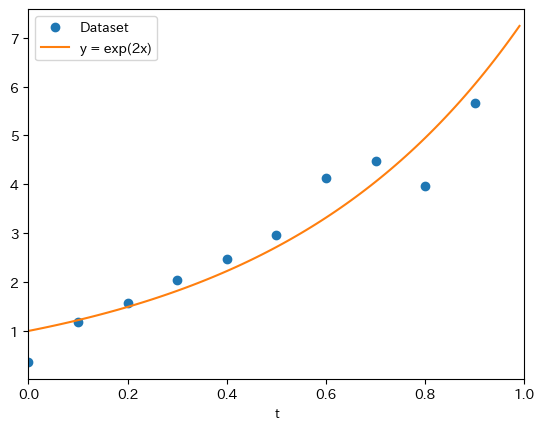

In [8]:
ax = plt.subplot(1,1,1)
df.plot("t", "Dataset", marker= "o", linestyle = "", ax = ax)
df.plot("t", "y = exp(2x)", ax=ax)
plt.xlim([0,1]);